# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

一个神经元计算一个线性函数，然后将结果输出到激活函数，输出

####  2. Why we use non-linear activation funcitons in neural networks?

如果都是线性的激活函数，整个网络可以被简化为一层的网络， 深层就没有意义了

#### 3. What is the 'Logistic Loss' ?

常用交叉熵损失

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

C

#### 5. Why we don't use zero initialization for all parameters ?

全为0的时候，神经网络中所有神经元的操作都是一样的

#### 6. Can you implement the softmax function using python ? 

In [181]:
import numpy as np
def softmax_fun(x):
    exp_x = np.exp(x)
    softmax_res = exp_x / np.sum(exp_x)
    return softmax_res

In [182]:
softmax_fun([1,2,3,4])

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [183]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [184]:
# Loading the data 
digits = datasets.load_digits()

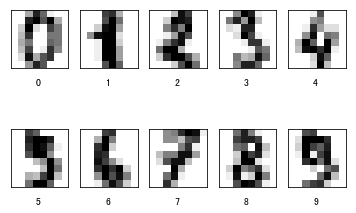

In [185]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [186]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [187]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [189]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [190]:
max([max(X_train[i]) for i in range(1347)])

16.0

In [191]:
#归一化数据
X_train = X_train/16

In [192]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [193]:
y_train

array([1, 0, 1, ..., 1, 0, 0])

#### 3- Architecture of the neural network

![title](./networks.png)

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [194]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1./(1 + np.exp(-1 * z))
    
    return s

In [195]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [196]:
# Random innitialize the parameters
#初始化w,b
def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''

    w = np.random.randn(dim, 1)
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [197]:
w,b = initialize_parameters(64)

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

In [198]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''

    arr = np.array( [(np.dot(w.T,sub_x)+b)  for sub_x in X ])
    arr = arr.flatten()

    
    A = sigmoid(arr)

    temp_cost = 0
    for i in range(len(A)):
        temp_cost += Y[i]*np.log(A[i])+(1- Y[i])* np.log(1-A[i])
    cost_func = -temp_cost / len(A)

    dw = ((A-Y) * X.T).mean(axis=1).reshape((-1, 1))
    db = (A-Y).mean()
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost_func = np.squeeze(cost_func)
    assert(cost_func.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost_func

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [235]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        w = w - learning_rate*dw

        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

In [ ]:
params, grads, costs  = optimize(w, b, X_train,y_train, 1000, 0.5, print_cost=True)

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [203]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]

    Y_prediction = np.zeros((1,m))
    
    arr = np.array( [(np.dot(w.T,sub_x)+b)  for sub_x in X ])
    arr = arr.flatten()    
    A = sigmoid(arr)
    A[A < 0.5 ] = 0
    A[A >= 0.5] = 1 

    Y_prediction = A.reshape(1,m)
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [207]:
predict_test = predict(params['w'],params['b'],X_train)

In [211]:
y_train

array([1, 0, 1, ..., 1, 0, 0])

In [223]:
predict_test = predict_test.flatten()

In [227]:
true_positive_num=0
true_negtive_num = 0

In [228]:
#可以用于计算精确度
for i in range(len(y_train)):
    if predict_test[i]==y_train[i] and predict_test[i]==1:
        true_positive_num+=1
    elif predict_test[i]==y_train[i] and predict_test[i]==0:
        true_negtive_num+=1
    

In [231]:
(true_positive_num+true_negtive_num)/len(predict_test)

0.9064587973273942

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [232]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    w,b = initialize_parameters(64)
    
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    Y_predictiontrain = predict(params['w'],params['b'],X_train)
    
    Y_prediction = predict(params['w'],params['b'],X_test)
    
    traing_accuracy = np.mean(Y_predictiontrain.flatten()==Y_train)
    test_accuracy = np.mean(Y_prediction.flatten()==Y_test)
    d = {"w":w,
         "b":b,
         "training_accuracy": traing_accuracy,
         "test_accuracy":test_accuracy,
         "cost":costs[-1]}
    
    return d
    
                   

In [233]:
result = model(X_train, y_train, X_test, y_test, 1000, 0.5, True)

Cost after iteration 0: 0.888834
Cost after iteration 100: 0.385115
Cost after iteration 200: 0.319733
Cost after iteration 300: 0.293021
Cost after iteration 400: 0.278168
Cost after iteration 500: 0.268590
Cost after iteration 600: 0.261876
Cost after iteration 700: 0.256912
Cost after iteration 800: 0.253103
Cost after iteration 900: 0.250097


In [234]:
result

{'w': array([[ 0.78689253],
        [ 1.41732892],
        [ 1.4868749 ],
        [-0.78973947],
        [ 0.41225941],
        [ 1.67971963],
        [-0.37954773],
        [-0.69823441],
        [ 1.30566804],
        [ 1.49576993],
        [ 1.12487472],
        [-0.80027255],
        [-0.3340433 ],
        [-0.45305504],
        [-0.51361146],
        [-0.27430937],
        [ 0.13746839],
        [ 0.93784055],
        [-0.37975903],
        [ 0.91027084],
        [-0.78274751],
        [-1.13171966],
        [-1.81081798],
        [-1.24923786],
        [ 0.54775683],
        [ 1.78511031],
        [-0.71852813],
        [ 0.06767864],
        [ 1.06013601],
        [ 0.31041704],
        [-0.89772249],
        [ 0.79396213],
        [ 1.41572331],
        [ 0.2274215 ],
        [ 0.18358544],
        [-0.64659258],
        [-0.6996186 ],
        [ 0.23769465],
        [ 0.44020071],
        [-0.54336374],
        [ 0.88678957],
        [-1.17934778],
        [-0.4181917 ],
      

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

In [239]:
result =[]

In [240]:
learning_rate_list = [1,0.7, 0.5, 0.2, 0.1,0.05,0.01 ]

In [242]:
for i in learning_rate_list:
        result.append(model(X_train, y_train, X_test, y_test, 1000, i, False))

In [247]:
for i,sub_res in enumerate(result):
    print("learning rate:",learning_rate_list[i])
    print("training_accuracy",result[i]['training_accuracy'])
    print("test_accuracy",result[i]['test_accuracy'])
    print("cost",result[i]['cost'])

learning rate: 1
training_accuracy 0.9153674832962138
test_accuracy 0.8755555555555555
cost 0.23713231835557494
learning rate: 0.7
training_accuracy 0.910913140311804
test_accuracy 0.8822222222222222
cost 0.2433379041076601
learning rate: 0.5
training_accuracy 0.9086859688195991
test_accuracy 0.8777777777777778
cost 0.25325624466770846
learning rate: 0.2
training_accuracy 0.8923533778767632
test_accuracy 0.8755555555555555
cost 0.28747790045439636
learning rate: 0.1
training_accuracy 0.8916109873793615
test_accuracy 0.8577777777777778
cost 0.2972750440332437
learning rate: 0.05
training_accuracy 0.8812175204157386
test_accuracy 0.8533333333333334
cost 0.3461096441179317
learning rate: 0.01
training_accuracy 0.5775798069784707
test_accuracy 0.5866666666666667
cost 0.742810261734089


##### 4.2 Observe the effect of iteration_num on the test accuracy.

In [248]:
result =[]
iteration_num = [1,20, 100, 500, 1000,2000]
for i in iteration_num:
        result.append(model(X_train, y_train, X_test, y_test, i, 1, False))

In [249]:
for i,sub_res in enumerate(result):
    print("iteration_num:",iteration_num[i])
    print("training_accuracy",result[i]['training_accuracy'])
    print("test_accuracy",result[i]['test_accuracy'])
    print("cost",result[i]['cost'])

iteration_num: 1
training_accuracy 0.49962880475129917
test_accuracy 0.5133333333333333
cost 1.130295413417961
iteration_num: 20
training_accuracy 0.6874536005939124
test_accuracy 0.6688888888888889
cost 1.633424891612926
iteration_num: 100
training_accuracy 0.8648849294729027
test_accuracy 0.8355555555555556
cost 1.2438481367138077
iteration_num: 500
training_accuracy 0.9123979213066072
test_accuracy 0.8755555555555555
cost 0.2544136260817647
iteration_num: 1000
training_accuracy 0.9123979213066072
test_accuracy 0.88
cost 0.23825133561956316
iteration_num: 2000
training_accuracy 0.9123979213066072
test_accuracy 0.8777777777777778
cost 0.23309504819986995


# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

In [250]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [253]:
y_train

array([3, 0, 6, ..., 0, 0, 2])

In [256]:
after_y_train =  np.zeros((len(y_train),10))
for index_,sub_num in enumerate(y_train) :
    after_y_train[index_][sub_num]=1
    

In [260]:
after_y_test =  np.zeros((len(y_test),10))
for index_,sub_num in enumerate(y_test) :
    after_y_test[index_][sub_num]=1

# Congratulations ! You have completed assigment 4. 